In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

In [64]:
# Similar analysis as in Question a) 'Processed_data_2.csv' contains features that were scaled, encoded in question a) 
data = pd.read_csv('Processed_data_2.csv')

In [65]:
data = data[data['Outcome'] == 'R']

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 4 to 196
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         47 non-null     int64  
 1   Time                       47 non-null     int64  
 2   radius_mean                47 non-null     float64
 3   texture_mean               47 non-null     float64
 4   perimeter_mean             47 non-null     float64
 5   area_mean                  47 non-null     float64
 6   smoothness_mean            47 non-null     float64
 7   compactness_mean           47 non-null     float64
 8   concavity_mean             47 non-null     float64
 9   concave_points_mean        47 non-null     float64
 10  symmetry_mean              47 non-null     float64
 11  fractal_dimension_mean     47 non-null     float64
 12  radius_std_dev             47 non-null     float64
 13  texture_std_dev            47 non-null     float64


In [67]:
data.drop(['Outcome'],inplace=True,axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Time','ID'],axis=1),data['Time'], test_size=0.35, random_state=101)

0.5204400371390676
12.86542619480475
0.1882442687524294
7.737483028486471
0.8814814844290217


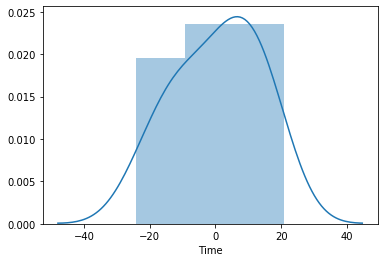

In [70]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)
mean_error = np.mean(y_test-pred1)
print(mean_error)
print(np.sqrt(mean_squared_error(y_test,pred1)))
sns.distplot(y_test-pred1)

train_pred1 = model1.predict(data.drop(['Time','ID'],axis=1))
print(np.mean(data['Time']-train_pred1))
print(np.sqrt(mean_squared_error(data['Time'],train_pred1)))

print(r2_score(data['Time'],train_pred1))


4.696444819955265
8.05512295862845
1.6987142816502998
4.844486024085197
0.9535396797386738


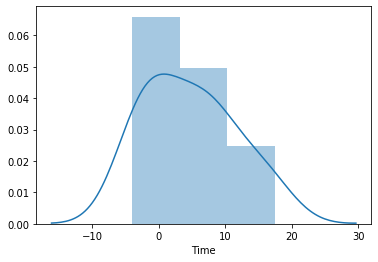

In [71]:
model2 = XGBRegressor(booster='dart')
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
mean_error = np.mean(y_test-pred2)
print(mean_error)
print(np.sqrt(mean_squared_error(y_test,pred2)))
sns.distplot(y_test-pred2)

train_pred2 = model2.predict(data.drop(['Time','ID'],axis=1))
print(np.mean(data['Time']-train_pred2))
print(np.sqrt(mean_squared_error(data['Time'],train_pred2)))

print(r2_score(data['Time'],train_pred2))



In [58]:
#Is not the correct fit.
train_pred1

array([27.        , 64.09851029, 77.        , 60.15371132, 10.        ,
       10.        ,  9.        ,  2.42636223, 48.        , 11.        ,
       34.        , 19.        , 26.        , 40.        , 11.28902887,
       35.        , 82.42372582,  7.        , 44.        ,  8.        ,
       -3.87398864, 75.17571698, 12.77226025, 19.        , 49.54335124,
       12.        , 37.        ,  5.        , 58.        , 78.        ,
        6.37535764, 33.        ,  4.        ,  5.        ,  2.        ,
       45.67675238,  1.        ,  9.        ,  2.43121558, -1.99216664,
       14.        , 12.        , 26.80346213, -2.32314883, 32.26858156,
        1.        , 11.9037872 ])

In [59]:
train_pred2

array([26.999945 , 68.78636  , 77.00024  , 35.898537 , 10.000188 ,
       10.000082 ,  9.0001135,  4.614289 , 47.999084 , 10.999986 ,
       34.00043  , 18.999346 , 26.000277 , 40.00017  , 11.898436 ,
       34.99993  , 76.421776 ,  7.0001483, 43.99929  ,  7.9998507,
        8.386093 , 76.50644  ,  3.4672353, 18.99986  , 37.83654  ,
       11.999959 , 37.000416 ,  5.0001397, 57.999783 , 77.9984   ,
        6.5164776, 32.99998  ,  4.000926 ,  5.0006485,  2.0000267,
       33.619457 ,  1.0003784,  8.999845 ,  6.981586 ,  2.8699515,
       13.999549 , 12.000164 , 12.814824 ,  4.065981 ,  6.55621  ,
        1.0008364,  6.920244 ], dtype=float32)

In [74]:
np.array(data['Time'])

array([27, 77, 77, 36, 10, 10,  9,  8, 48, 11, 34, 19, 26, 40, 10, 35, 73,
        7, 44,  8, 17, 74, 17, 19, 39, 12, 37,  5, 58, 78, 24, 33,  4,  5,
        2, 49,  1,  9, 16,  9, 14, 12, 11,  7, 14,  1,  3], dtype=int64)

In [75]:
final_sub = pd.DataFrame(data=zip(data['ID'],train_pred2),columns=['ID','Time_prediction'])
final_sub.to_csv('question_b.csv',index=False)

In [76]:
final_sub

,ID,Time_prediction
0,843584,26.999945
1,843786,68.786362
2,844582,77.000237
3,847990,35.898537
4,848620,10.000188
5,851509,10.000082
6,855625,9.000113
7,857010,4.614289
8,857438,47.999084
9,857637,10.999986
